In [ ]:
import numpy as numpy
import jax
import jax.numpy as jnp
import importlib
import matplotlib.pyplot as plt
import seaborn as sns

import dynamic2

In [79]:
importlib.reload(dynamic2)

<module 'dynamic2' from '/Users/lucaraffo/Desktop/CFM_2025/codes_final/dynamic2.py'>

In [80]:
n_spins = 10

In [81]:
seed = 0
key = jax.random.PRNGKey(seed)
h = jax.random.uniform(key, shape=(n_spins,), minval=-1.0, maxval=1.0)

In [82]:
J = dynamic2.J_maker_nonsymmetric(n_spins, p = 0.2, minval = -1.0, maxval = 1.0, seed = 0)

<Axes: >

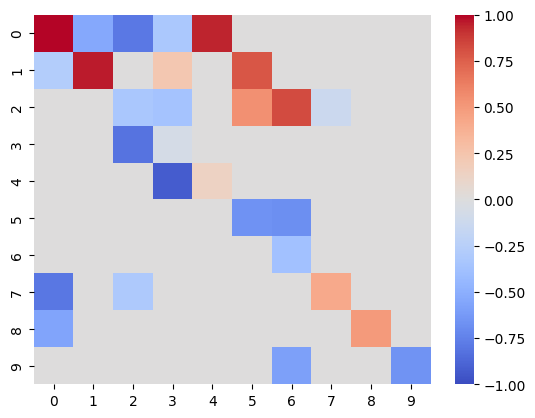

In [83]:
sns.heatmap(J + jnp.diag(h), vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [84]:
n_samples = 200

In [85]:
traj = dynamic2.glauber_parallel_jax(J, h, n_samples, sigma0 = None, return_trajectory = True, seed = 0)

In [86]:
traj_out = dynamic2.glauber_parallel_jax(J, h, n_samples, sigma0 = None, return_trajectory = True, seed = 1)

In [87]:
J_mle, _ = dynamic2.inverse_glauber_trajectory("MLE", 0.1, "F", traj, traj_out)

λ = 0.019446  (reg = 0.1)
Selecting best snapshot by out-of-sample log-likelihood...
  -> selected snapshot at step 130 


In [88]:
sns.heatmap(J_mle, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

<Axes: >

In [89]:
J_ret, bic, score, maskedss = dynamic2.bic_procedure(traj, traj_out, J_mle, "MLE", "F")

In [90]:
plt.plot(bic)

In [92]:
sns.heatmap(J_ret, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

<Axes: >

In [95]:
J_mle_final, _ = dynamic2.inverse_glauber_trajectory("MLE", 0.0, "F", traj, traj_out, adj = dynamic2.mask(J_ret, 1e-5))

λ = 0  (reg = 0.0)
Selecting best snapshot by out-of-sample log-likelihood...
  -> selected snapshot at step 129 


<Axes: >

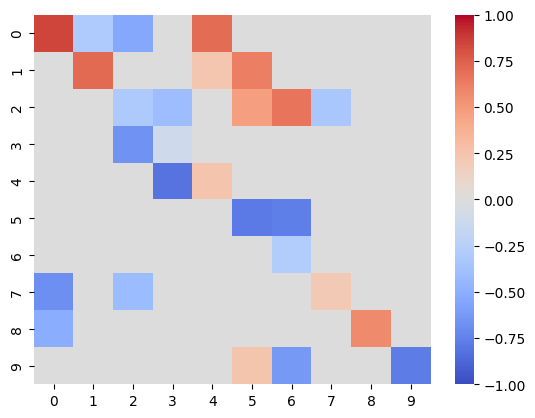

In [96]:
sns.heatmap(J_mle_final, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")